# Qualidade das Bananas

## Contextualização


## Importação


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
# simulação de conjuntos de dados
from sklearn.datasets import make_blobs

# pipelines e transformadores
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer

# codificação de variáveis
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer

# normalização
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# dados faltantes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression # modelo para imputação quantitativa

# para facilitar os exemplos
from sklearn import set_config
set_config(transform_output = "pandas")

#modelos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor


# treinamento de modelos
from sklearn.model_selection import train_test_split

# para comparação dos modelos
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Carregamento de dados e visão geral

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("l3llff/banana")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\graci.DESKTOP-I7T8UK6\.cache\kagglehub\datasets\l3llff\banana\versions\5


In [4]:
! pip install -U kagglehub


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# verificar o conteudo do arquivo

path = r"C:\Users\graci.DESKTOP-I7T8UK6\.cache\kagglehub\datasets\l3llff\banana\versions\5"
print(os.listdir(path))


['banana_quality.csv']


In [6]:
# Caminho completo do arquivo CSV
csv_path = os.path.join(path, "banana_quality.csv")

# Ler o CSV
df = pd.read_csv(csv_path)



In [ ]:
# Exibir primeiras linhas
c

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Informações Gerais


In [8]:
print("\nInformações gerais:")
df.info()


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [9]:
df.shape

(8000, 8)

In [10]:
# Ver estatísticas das variáveis numéricas
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [11]:
## tipo de dados
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [12]:
# renomear as colunas
df.rename(columns={
    'Size': 'Tamanho', 
    'Weight': 'Peso', 
    'Sweetness': 'Doçura', 
    'Softness': 'Maciez', 
    'HarvestTime': 'Época de Colheita', 
    'Ripeness': 'Maturidade',
    'Acidity': 'Acidez', 
    'Quality': 'Qualidade'
}, inplace=True)

In [13]:
print("Colunas: ")
df.columns

Colunas: 


Index(['Tamanho', 'Peso', 'Doçura', 'Maciez', 'Época de Colheita',
       'Maturidade', 'Acidez', 'Qualidade'],
      dtype='object')

In [14]:
# checkar valores nulls
df.isnull().sum()

Tamanho              0
Peso                 0
Doçura               0
Maciez               0
Época de Colheita    0
Maturidade           0
Acidez               0
Qualidade            0
dtype: int64

In [15]:
## checar duplicadas
df.duplicated().sum()

0

In [16]:
df['Qualidade'].value_counts()

Qualidade
Good    4006
Bad     3994
Name: count, dtype: int64

In [17]:
## atribuir 0 para Bad ou ruim e 1 para Good

df['Qualidade'] = df['Qualidade'].map({'Good': 'Bom', 'Bad': 'Ruim'}) 


In [18]:
df.head()

,Tamanho,Peso,Doçura,Maciez,Época de Colheita,Maturidade,Acidez,Qualidade
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Bom
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Bom
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Bom
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Bom
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Bom


## Dicionário de dados

In [19]:
# Criação do discionario de dados 
data_dictionary = pd.DataFrame([
    {
        'variavel': 'Tamanho',
        'descrição': 'Tamanho da banana em cm',
        'tipo':'quantitativa',
        'subtipo':'continua',
    },
    {
        'variavel': 'Peso',
        'descrição': 'Peso da banana em grama',
        'tipo':'quantitativa',
        'subtipo':'continua',
    },
    {
        'variavel': 'Doçura',
        'descrição': 'Teor de açúcar / Doçura',
        'tipo':'quantitativa',
        'subtipo':'continua',
    },
    {
        'variavel': 'Maciez',
        'descrição': 'Maciez da fruta',
        'tipo':'quantitativa',
        'subtipo':'continua',
    },
    {
        'variavel': 'Época de Colheita',
        'descrição': 'Tempo decorrido desde a colheita da fruta',
        'tipo':'quantitativa',
        'subtipo':'continua',
    },
     {
        'variavel': 'Maturidade',
        'descrição': 'Grau de maturação da fruta',
        'tipo':'quantitativa',
        'subtipo':'continua',
    },
    {
        'variavel': 'Acidez',
        'descrição': 'Acidez da fruta',
        'tipo':'quantitativa',
        'subtipo':'continua',
    },
    {
        'variavel': 'Qualidade',
        'descrição': 'Qualidade da fruta',
        'tipo':'qualitativa',
        'subtipo':'categorica',
    }
    
])

In [20]:
data_dictionary

,variavel,descrição,tipo,subtipo
0,Tamanho,Tamanho da banana em cm,quantitativa,continua
1,Peso,Peso da banana em grama,quantitativa,continua
2,Doçura,Teor de açúcar / Doçura,quantitativa,continua
3,Maciez,Maciez da fruta,quantitativa,continua
4,Época de Colheita,Tempo decorrido desde a colheita da fruta,quantitativa,continua
5,Maturidade,Grau de maturação da fruta,quantitativa,continua
6,Acidez,Acidez da fruta,quantitativa,continua
7,Qualidade,Qualidade da fruta,qualitativa,categorica


## Verificar os Outliers

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


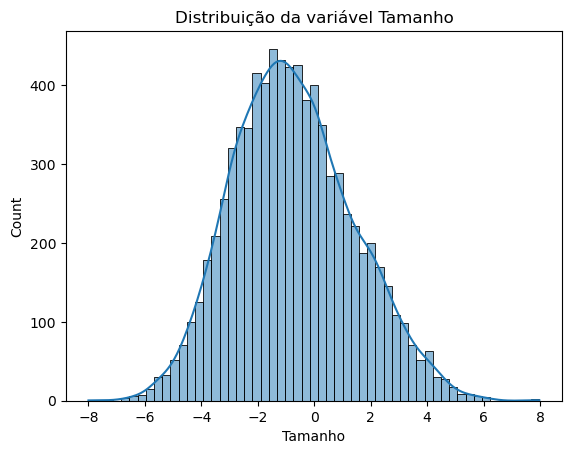

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


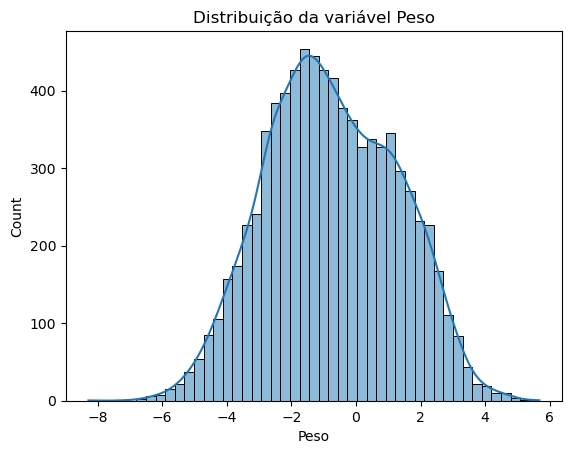

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


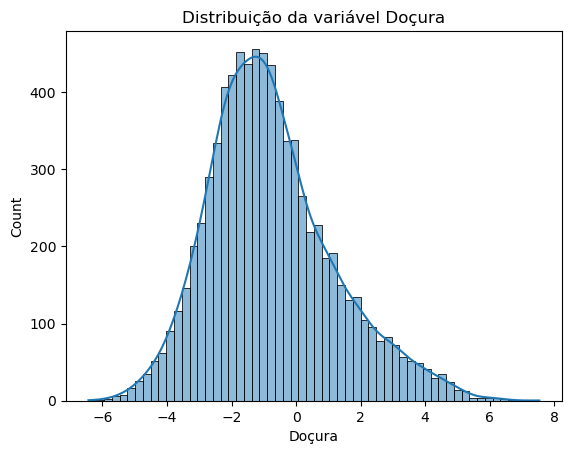

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


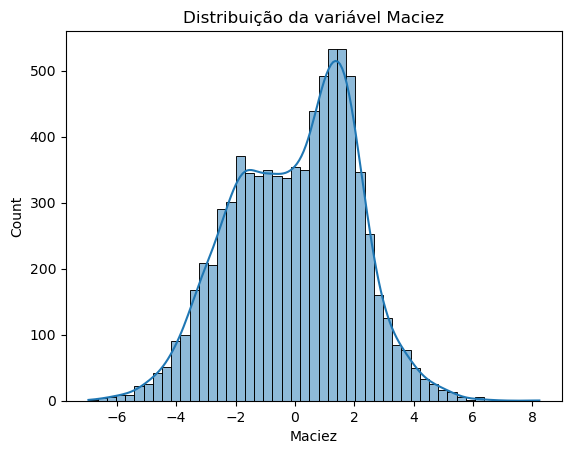

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


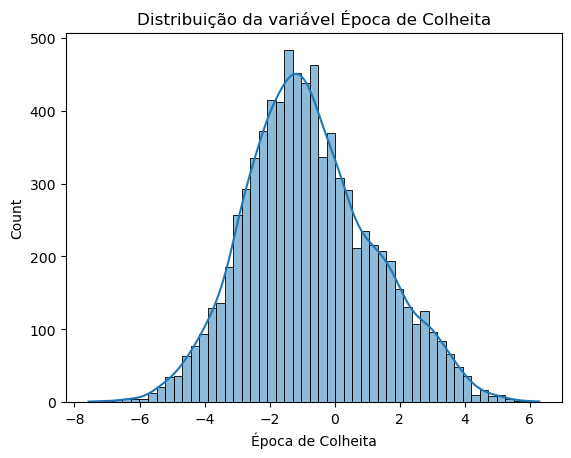

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


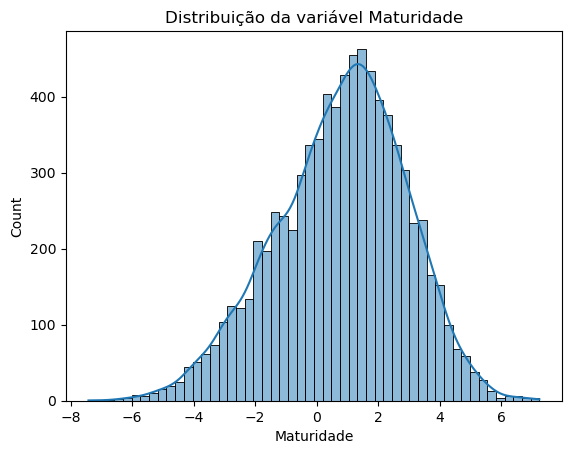

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


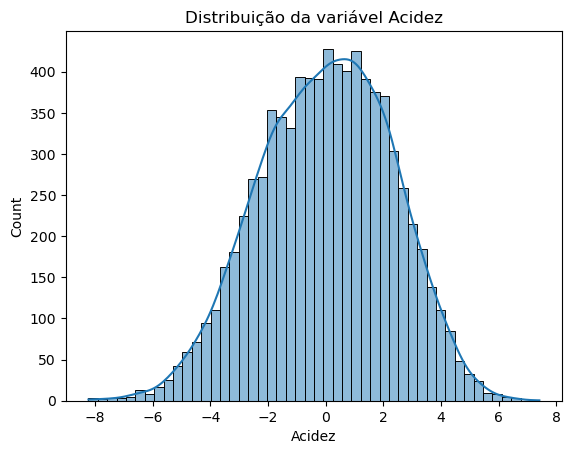

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


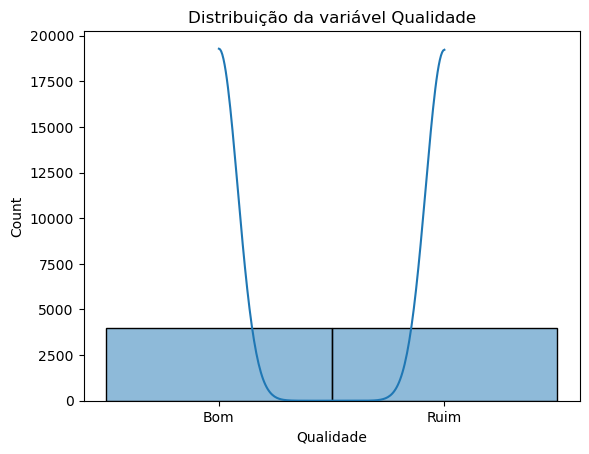

In [21]:
# visualizando distribuições com histogramas para ter intuição quanto a outliers
for col in df:

    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

In [22]:
## Método do Quartil.
for col in df.drop(columns='Qualidade'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    aux_outliers = df[(df[col] < Q1-(IQR*1.5)) 
                   | (df[col] > Q3+(IQR*1.5))]
    
    indices_outliers = aux_outliers.index.to_list()
    
    if len(indices_outliers) >= 1:
        
        print(f"A coluna {col} tem {len(indices_outliers)} outliers!")
        print("\nOs índices deles são:\n")
        print(indices_outliers)
        
    else:
        print(f"A coluna {col} não tem outliers!")
    
    print("")
    print("="*80)
    print("")
    

A coluna Tamanho tem 36 outliers!

Os índices deles são:

[2230, 2347, 3252, 3515, 4031, 4034, 4206, 4261, 4335, 4348, 4481, 4516, 4523, 4648, 4762, 4877, 4887, 4928, 4971, 5015, 5057, 5150, 5154, 5328, 5383, 5447, 5449, 5621, 5659, 5721, 5726, 5761, 5774, 5797, 5805, 6754]


A coluna Peso tem 3 outliers!

Os índices deles são:

[686, 6660, 7655]


A coluna Doçura tem 178 outliers!

Os índices deles são:

[7, 27, 30, 40, 53, 67, 103, 106, 133, 135, 139, 149, 162, 178, 182, 186, 189, 210, 231, 232, 239, 252, 261, 309, 315, 316, 327, 363, 370, 376, 396, 402, 411, 425, 429, 439, 441, 451, 456, 461, 467, 482, 490, 519, 524, 529, 535, 538, 541, 543, 581, 582, 595, 597, 600, 602, 603, 626, 638, 668, 685, 722, 740, 748, 766, 769, 770, 824, 844, 869, 877, 884, 909, 927, 934, 944, 955, 957, 966, 986, 987, 1010, 1011, 1013, 1034, 1045, 1047, 1055, 1082, 1088, 1090, 1095, 1109, 1116, 1142, 1144, 1149, 1153, 1167, 1169, 1171, 1180, 1217, 1238, 1245, 1260, 1263, 1264, 1269, 1272, 1305, 1310, 1318, 

-0.747801801669379